# Sales Data Analysis

Import Libraries and the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('C:\Projects Vinay\BIA-main\Vinay Padwal Data Science\Sales Data.csv')

In [3]:
df.head()

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.shape

(185950, 11)

Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index             185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df.describe()

,Index,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


Checking Null Values

In [7]:
df.isnull().sum()

Index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

There are no null values found in the dataset

<Axes: >

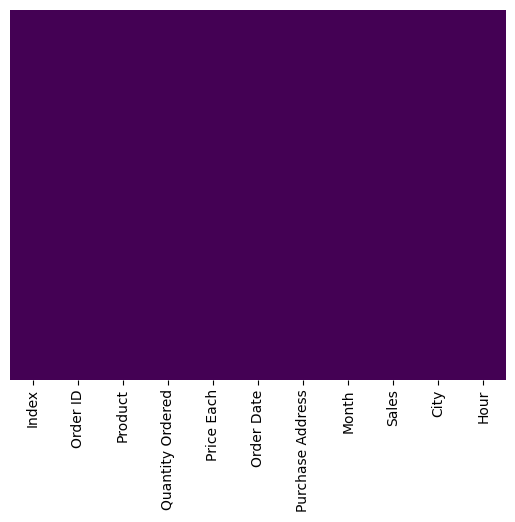

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

Exploratory Data Analysis

In [10]:
df.nlargest(5,'Sales')

,Index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
29683,4717,181069,Macbook Pro Laptop,2,1700.00,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.00,San Francisco,21
30183,5219,181544,Macbook Pro Laptop,2,1700.00,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.00,New York City,12
89114,6776,200528,Macbook Pro Laptop,2,1700.00,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.00,Boston,13
172777,385,210292,Macbook Pro Laptop,2,1700.00,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00,San Francisco,9
136628,20213,278637,ThinkPad Laptop,2,999.99,2019-10-02 16:06:00,"643 Cedar St, Boston, MA 02215",10,1999.98,Boston,16


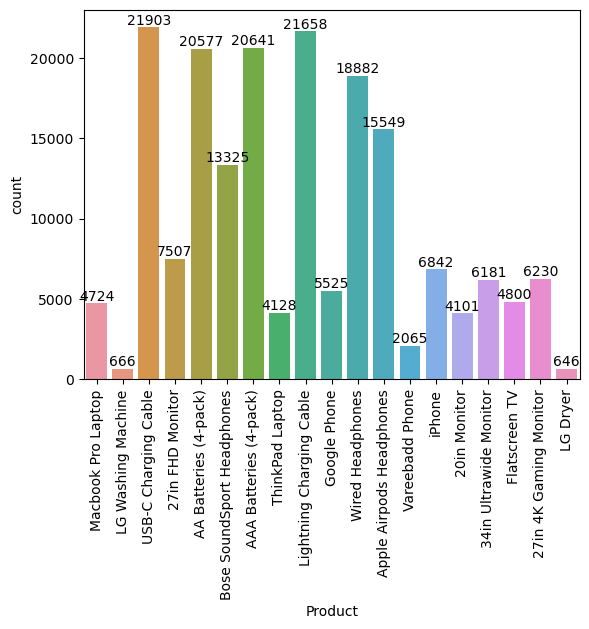

In [11]:
ax = sns.countplot(x='Product', data=df)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

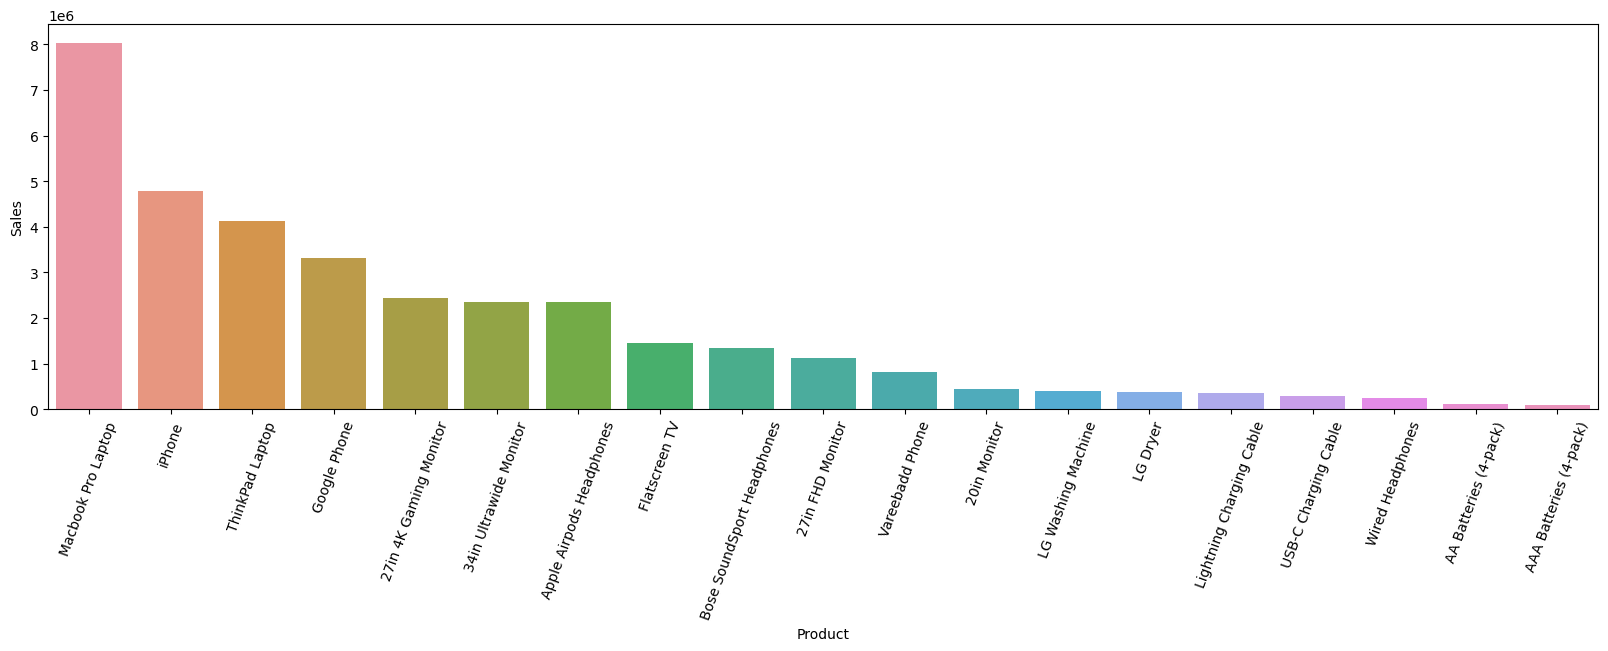

In [12]:
plt.figure(figsize=(20, 5))
sales = df.groupby(['Product'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x='Product', y='Sales', data=sales)
plt.xticks(rotation=70)
plt.show()

Highest Sold product is Mackbook Pro Laptop where as in the chart it shows lowest selling item is AAA batteries

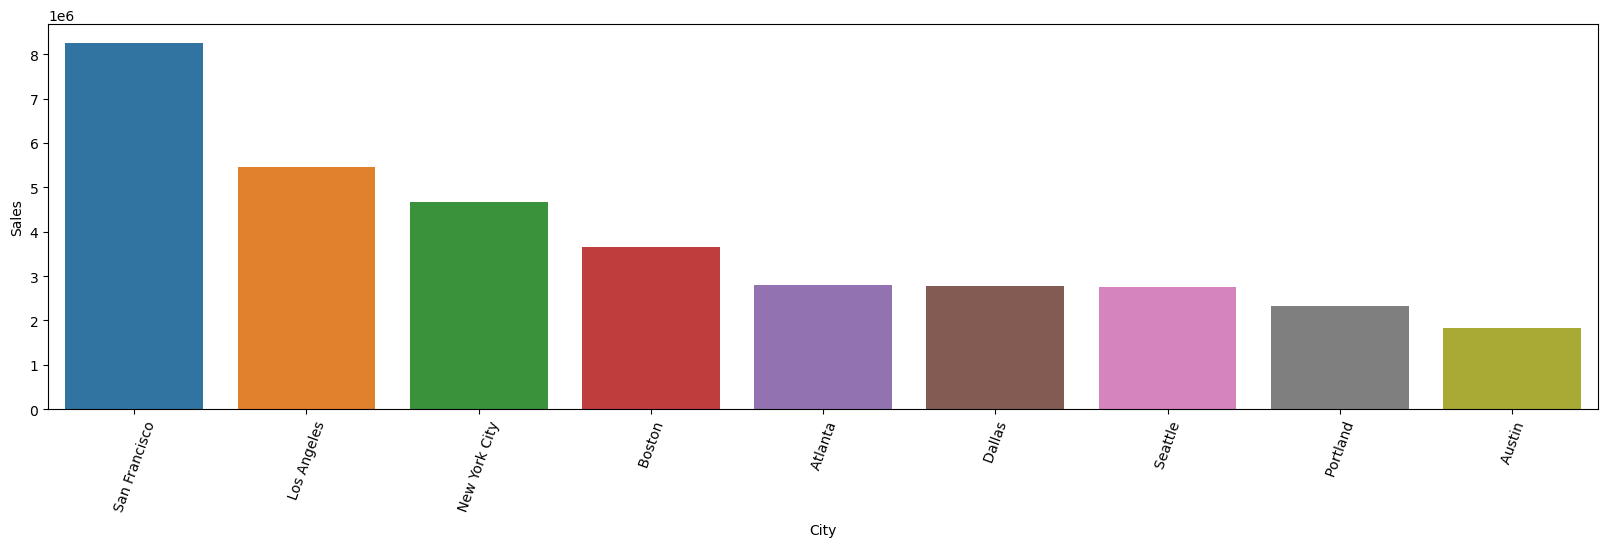

In [13]:
plt.figure(figsize=(20, 5))
sales = df.groupby(['City'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x='City', y='Sales', data=sales)
plt.xticks(rotation=70)
plt.show()

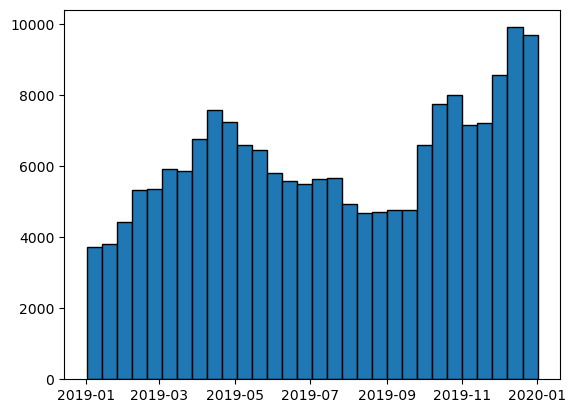

In [14]:
plt.hist(df['Order Date'], bins=30, edgecolor='k')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


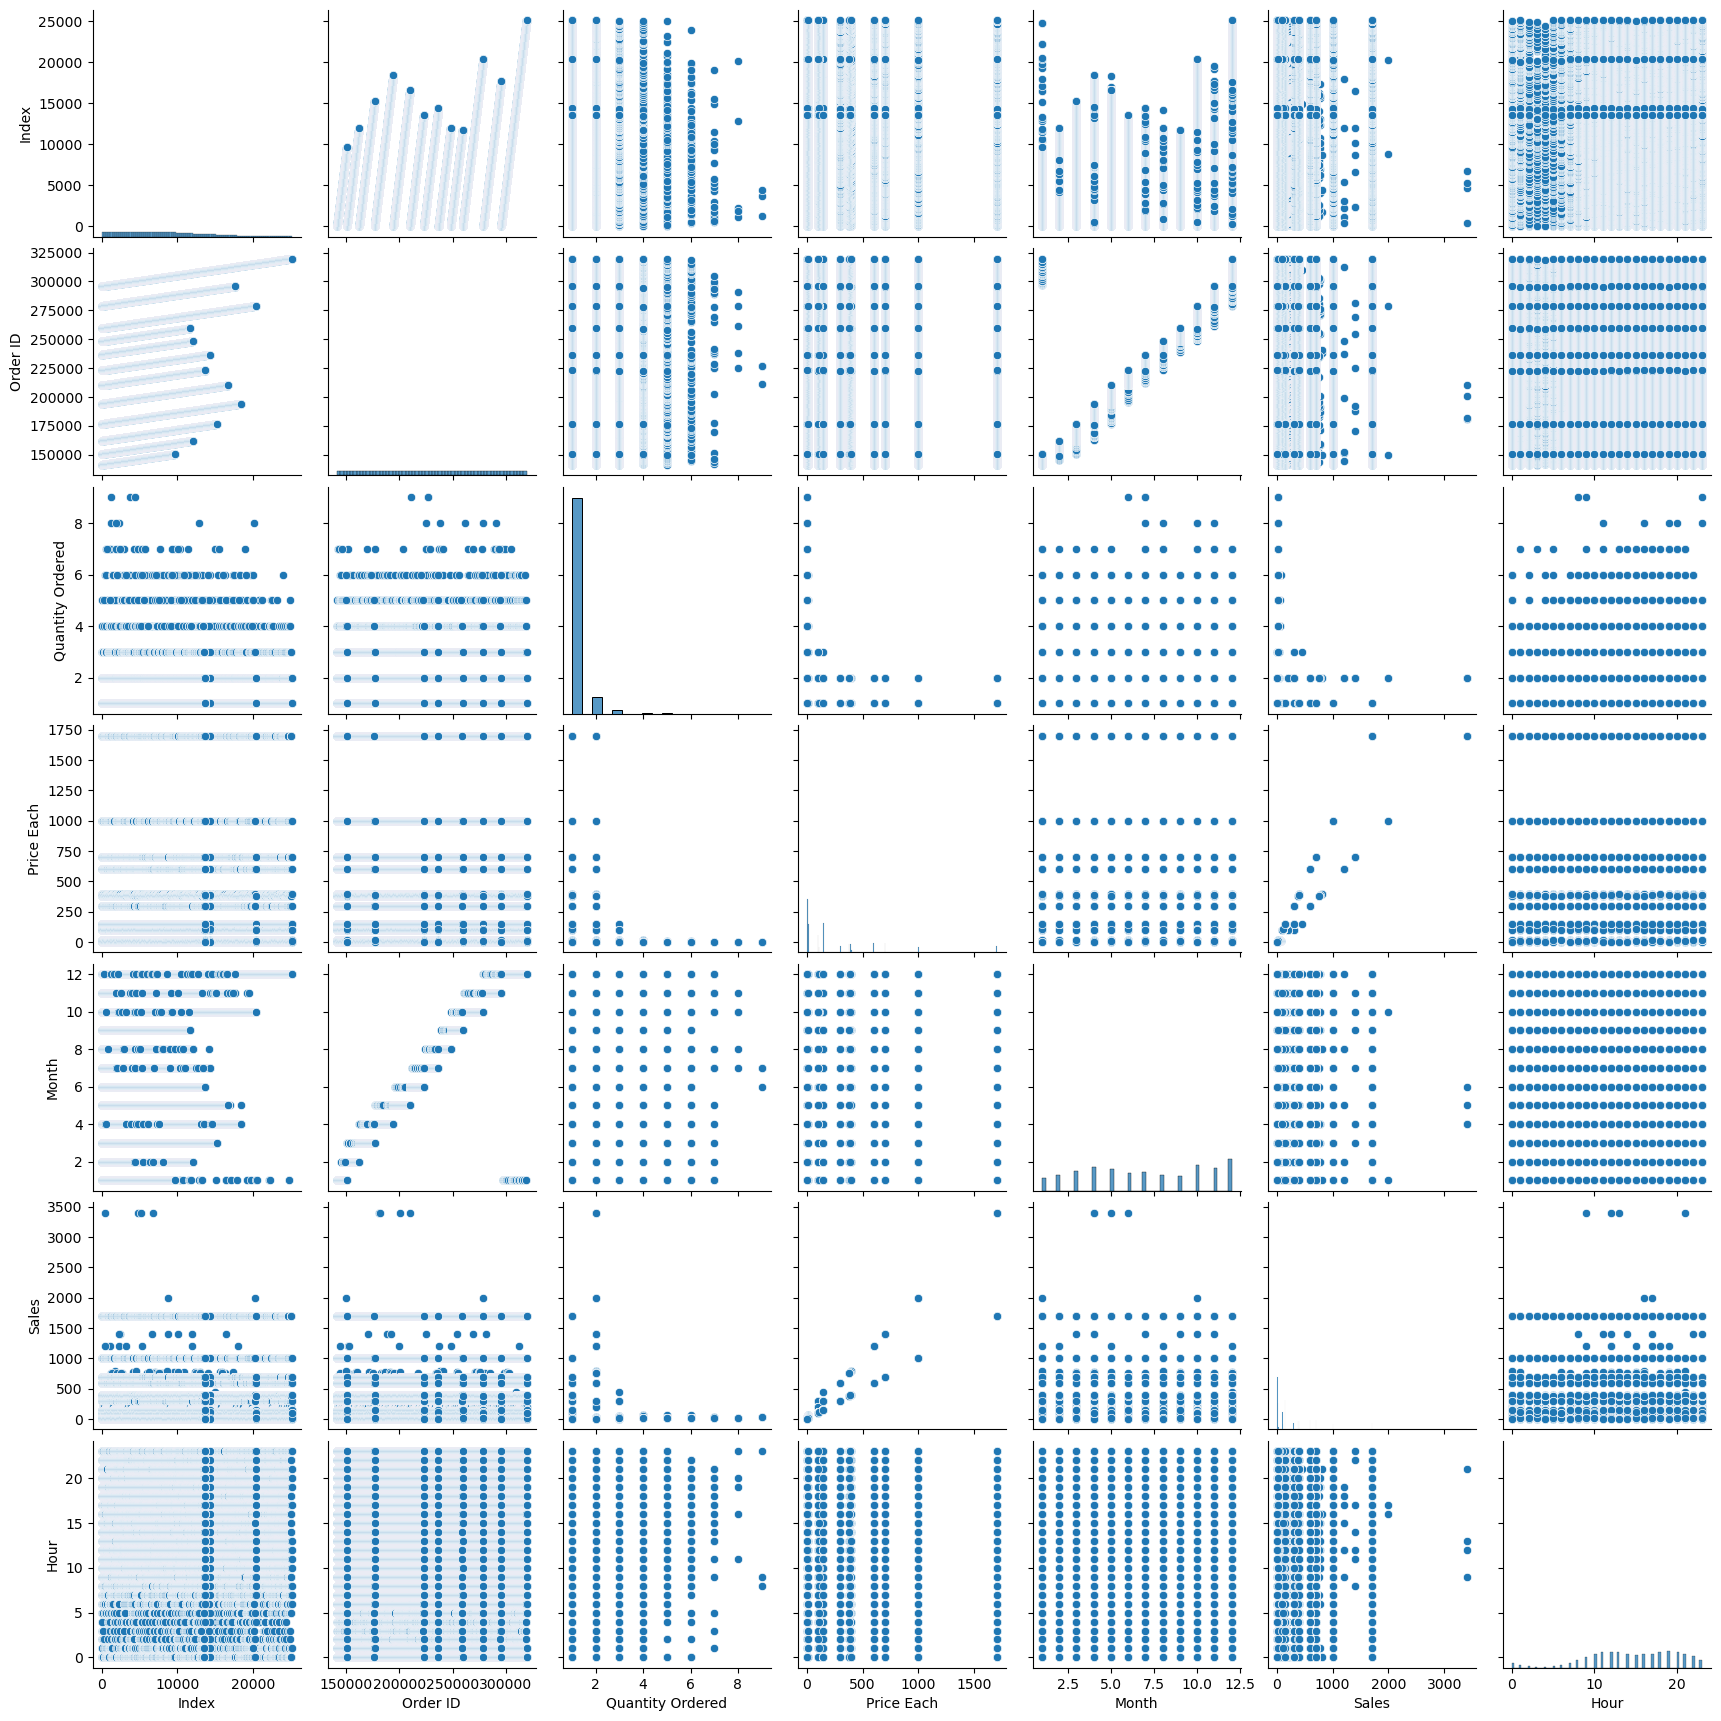

In [15]:
sns.pairplot(df)

In [16]:
df['TotalSales'] = df.groupby('Quantity Ordered')['Sales'].sum()
print(f"Total Sales: {df['TotalSales'].sum()}")

Total Sales: 34492035.97


Total sales made during that period is at 34.49M

In [17]:
df['QuantitySold'] = df.groupby('Quantity Ordered')['Quantity Ordered'].sum()
print(f"Quantity Sold: {df['Quantity Ordered'].sum()}")

Quantity Sold: 209079


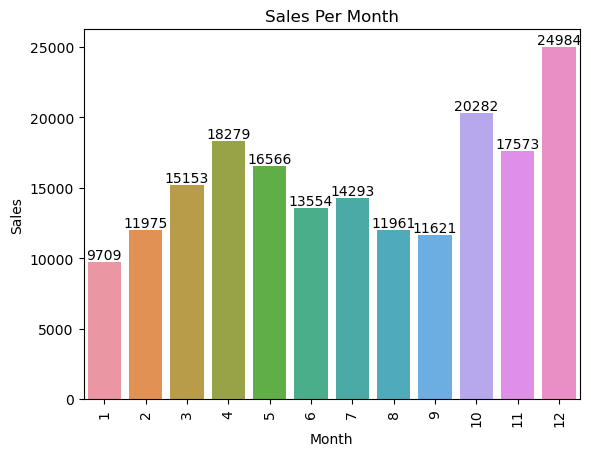

In [18]:
ax = sns.countplot(data=df,x='Month')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set(xlabel='Month',ylabel='Sales',title='Sales Per Month')

In the month of December highest sales recorded